In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
     

In [3]:
#Give dataset path
train_path = './Data/train'
test_path = './Data/test'

In [4]:
folders = glob('./Data/train/*')
len(folders)

4

In [5]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [7]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


# model.summary()
     
     

In [8]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [9]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase
     

In [12]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('./Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
     

Found 613 images belonging to 4 classes.


In [13]:

test_set = test_datagen.flow_from_directory('./Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.3337 - loss: 1.4893

/Users/larawehbe/Documents/Lara/Courses/TheAIEngineers-Notebooks/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3377 - loss: 1.4798 - val_accuracy: 0.5714 - val_loss: 0.9020
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/8


2024-10-08 16:20:51.339930: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-08 16:20:51.360111: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 924ms/step - accuracy: 0.5990 - loss: 0.8428 - val_accuracy: 0.5524 - val_loss: 0.9123
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/8


2024-10-08 16:21:09.979419: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6595 - loss: 0.7640 - val_accuracy: 0.7143 - val_loss: 0.6820
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7456 - loss: 0.6362 - val_accuracy: 0.6857 - val_loss: 0.7650
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-10-08 16:21:50.485321: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


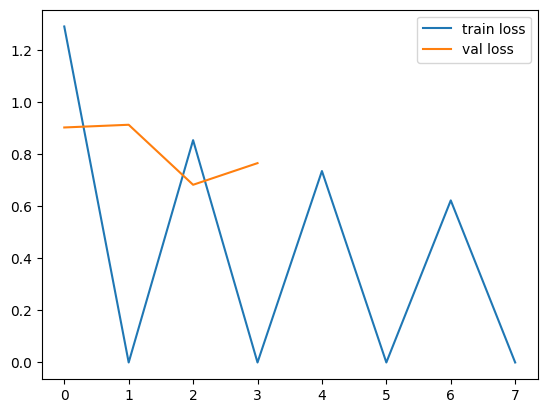

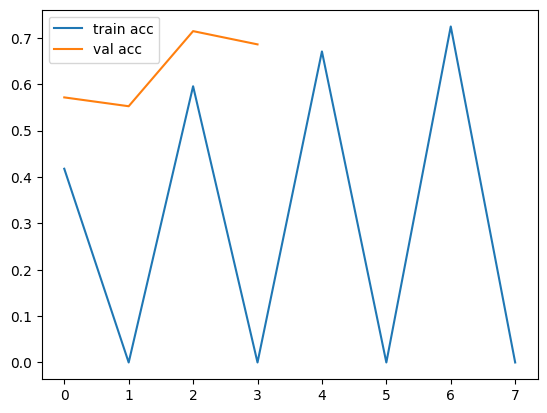

<Figure size 640x480 with 0 Axes>

In [17]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:

from tensorflow.keras.models import load_model

model.save('modelcancerlung.h5')
     

In [19]:
y_pred = model.predict(test_set)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred
     

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 739ms/step


array([3, 3, 0, 3, 2, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 2, 0, 0, 2, 3,
       3, 0, 0, 3, 3, 0, 2, 3, 3, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 3, 2,
       2, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 0, 3, 2, 3,
       2, 0, 2, 0, 0, 2, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 2, 0, 3, 0, 1, 2, 0, 2, 0, 0,
       0, 0, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 2, 0, 3, 3, 3, 2, 0, 3, 3,
       0, 3, 0, 3, 0, 3, 3, 3, 2, 0, 3, 2, 3, 3, 3, 1, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 3, 0, 0, 3, 3, 2,
       0, 0, 0, 0, 3, 3, 3, 0, 2, 0, 3, 0, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 0, 2, 3, 2, 3, 3, 3, 0, 2, 3, 2, 0, 3, 0, 0, 0,
       0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3,
       0, 3, 0, 2, 0, 0, 2, 3, 0, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 3, 3,
       0, 2, 3, 2, 3, 3, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 0, 0, 0, 2, 0, 2,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 2, 2, 0, 3, 0,

In [20]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]


In [21]:

def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
AdenocarcinomaChest Lung Cancer 


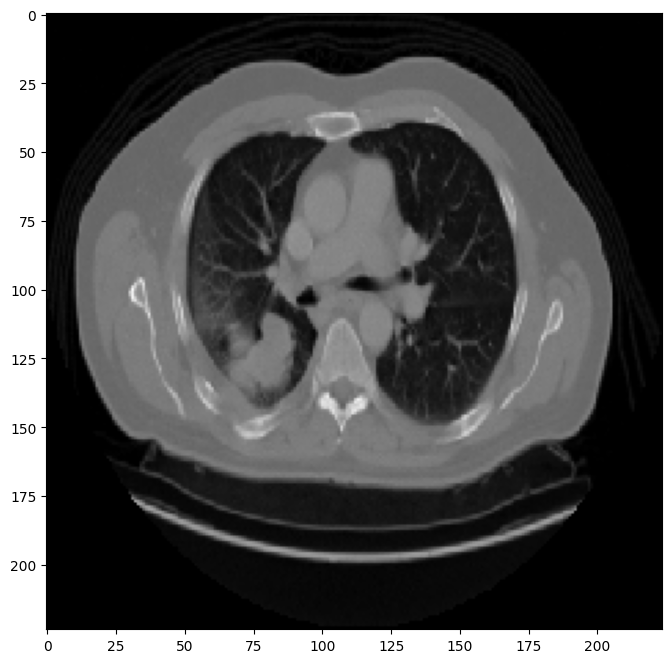

In [23]:

im=image.load_img('./Data/test/adenocarcinoma/000113 (7).png',target_size=(224,224))
predict_image(im)
     